In [3]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")

In [5]:
df.sample(4)

,clean_comment,category
9022,made thread with something like this but prob...,1
15378,guys been actual conversation hopefully those...,1
19394,would recommend not skipping the story this g...,1
16544,what would give for that hairstyle game,-1


In [6]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the data by handling missing values, duplicates, and empty strings."""
    
    # Removing missing values
    df.dropna(inplace=True)
    # Removing duplicates
    df.drop_duplicates(inplace=True)
    # Removing rows with empty strings
    df = df[df['clean_comment'].str.strip() != '']
    
    
    return df
    

In [7]:
processed_df=preprocess_data(df)

In [8]:
processed_df.sample(3)

,clean_comment,category
22063,kumarswamy and his mla stopped the gate police...,0
30704,well this was rather useless ama most the repl...,1
31450,javier from les miserables javert,0


In [9]:
processed_df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [10]:
train_data, test_data = train_test_split(processed_df, test_size=0.20, random_state=42)

In [11]:
def preprocess_comment(comment):
    """Apply preprocessing transformations to a comment."""
    
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment
    

In [12]:
def normalize_text(df):
    """Apply preprocessing to the text data in the dataframe."""
    
    df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)
    
    return df

In [13]:
train_processed_data = normalize_text(train_data)
test_processed_data = normalize_text(test_data)

In [14]:
train_processed_data.sample(4)

,clean_comment,category
22793,vilnius kaip kiti jau pasak vidutin darb piges...,-1
8863,maybe maybe happy way,1
23621,forgot number minority appeasement scheme intr...,-1
3147,people buy people read newspaper,0


### **Feature Engineering:**

In [15]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [16]:
vectorizer = CountVectorizer(max_features=5000)

In [17]:
X_train = train_processed_data['clean_comment'].values
y_train = train_processed_data['category'].values

#### **Applying BoW........**

In [18]:
X_train[:2]

array(['found young modi guess one',
       'holy shit heard whole johnny gosch story earlier year podcast called sword scale devastated thinking something like even possible government defining moment history need stop fucker'],
      dtype=object)

In [19]:
y_train[0:2]

array([1, 0])

In [20]:
X = vectorizer.fit_transform(X_train)

In [21]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(29434, 5000))

### **Setting MLflow tracking uri.......**

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import dagshub
dagshub.init(repo_owner='Pravat-21', repo_name='ML-Project-YouTube-Comment-Analysis', mlflow=True)

Accessing as Pravat-21

Initialized MLflow to track repo "Pravat-21/ML-Project-YouTube-Comment-Analysis"

Repository Pravat-21/ML-Project-YouTube-Comment-Analysis initialized!

In [27]:
mlflow.set_tracking_uri("https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow")
mlflow.set_experiment("RF-BoW Basemodel")

2025/11/03 17:16:08 INFO mlflow.tracking.fluent: Experiment with name 'RF-BoW Basemodel' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/c9c2d39b62f6433593f4cea5cee18b02', creation_time=1762170368593, experiment_id='0', last_update_time=1762170368593, lifecycle_stage='active', name='RF-BoW Basemodel', tags={}>

In [28]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 409970 stored elements and shape (29434, 5000)>

In [31]:
y=y_train

In [32]:
y

array([1, 0, 0, ..., 0, 1, 0], shape=(29434,))

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

## **Start tracking.......**

2025/11/03 18:20:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest Baseline TrainTestSplit at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/0/runs/f745e1991cfa489ca96161fdffe49659
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/0
accuracy :  0.6211992525904535


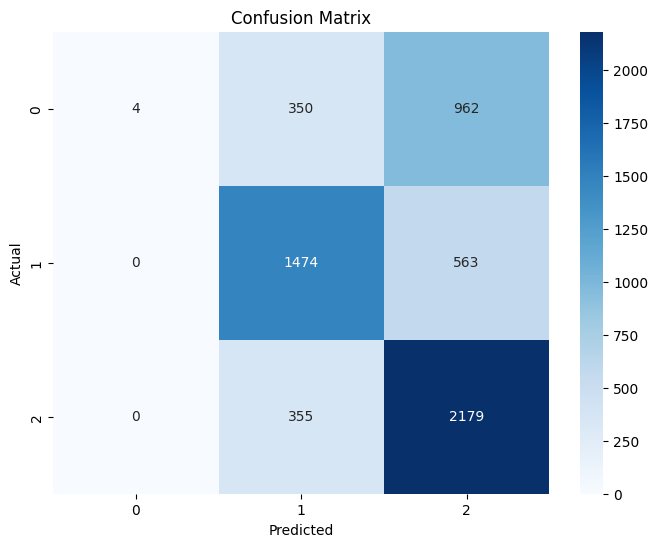

In [42]:
with mlflow.start_run() as run:

    mlflow.set_tags(
		{
			"mlflow.runName":"RandomForest Baseline TrainTestSplit",
            "experiment_type":"Baseline",
            "model_type":"RandomForestClassifier",
            "Description":"Baseline model for sentiment analysis of youtube comment using RF-BoW combination."
        }
    )
        
    

    n_estimators=100
    max_depth=10


    mlflow.log_params({
    "vectorizer_type":"CountVectorizer",
    "Vectorizer_max_feature":vectorizer.max_features,
    "max_depth":max_depth
    })

    model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)
	
    accuracy=accuracy_score(y_test,y_pred)
	
    mlflow.log_metric("accuracy",accuracy)
	
	

    class_rep = classification_report(y_test,y_pred,output_dict=True)
	
    for label, metrics in class_rep.items():
        if isinstance(metrics, dict):  # for precision, recall, f1-score
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)
                
    con_matrix = confusion_matrix(y_test,y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(con_matrix,annot=True, fmt="d",cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.savefig("confusion_matrix_02.png")
    
    mlflow.log_artifact("confusion_matrix_02.png")
	
    mlflow.sklearn.log_model(model,"Random_Forest_classifier")
	

print("accuracy : ",accuracy)
	
	


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.00      0.01      1316
           0       0.68      0.72      0.70      2037
           1       0.59      0.86      0.70      2534

    accuracy                           0.62      5887
   macro avg       0.75      0.53      0.47      5887
weighted avg       0.71      0.62      0.54      5887



So there are verious way to imorove the model performance

- Handling class imbalance
- More complex model
- Hyperprameter Tuning
- Use of Endemble
- Feature Engineering
- Data preprocessing
